# Day 5 Pandas:

This exercise is all about pandas!

![](pandas.gif)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1 Create DataFrames

We want to create some DataFrames with given structure, therefore fill the values with random numbers or categories.
- create one Dataframe by joining two Series, one with the category fruits, which has at least 5 different fruits. the other Series represent the price
- create a 24 x 7 numpy array, and build a DataFrame from it. The column index should be the days of the week, while the row index are the hours.
- write a dictionary containing cities. The city's name should be the key, and the following tuple should be the value for each key: _(population, name_of_country, isCapital, size, location-lat, location-long,)_. (google some cities)

In [2]:
fruit = pd.Series(["Apple","Banana","peach","watermelon","mango"])
price = pd.Series([12,16,9,32,8])
df = pd.concat([fruit,price],axis=1)
df

,0,1
0,Apple,12
1,Banana,16
2,peach,9
3,watermelon,32
4,mango,8


In [3]:
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
times = pd.timedelta_range(start=0,periods=24,freq="1H")
df = pd.DataFrame(np.random.randn(24,7),index=times,columns=days)

In [4]:
cities = {}
cities["Shanghai"] = (24.24*10**6, "China", False, 6340, 31.2304, 121.4737)
cities["Beijing"] = (21.54*10**6, "China", True, 16808, 39.9042, 116.4074)
cities["Berlin"] = (3.748*10**6, "German", True, 891.8, 52.5200, 13.4050)
cities

{'Shanghai': (24240000.0, 'China', False, 6340, 31.2304, 121.4737),
 'Beijing': (21540000.0, 'China', True, 16808, 39.9042, 116.4074),
 'Berlin': (3748000.0, 'German', True, 891.8, 52.52, 13.405)}

## 2 Analyze Data

We want to analyze some data about some car seller. Therefore load the csv file _Automobile_data.csv_. Since the data is not fully clean, Replace all column values which contain ‘?’ and n.a with np.NaN.

Afterwards answer the following questions:
- whats the most expensive car's company name? Print out the car's name, company and price
- Count total cars per company
- Find each company’s Higesht price car

In [5]:
automobile_df = pd.read_csv("Automobile_data.csv")
automobile_df

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


In [12]:
automobile_df.idxmax()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,eight,184,14,45400.0
11,14,bmw,sedan,103.5,193.8,ohc,six,182,16,41315.0
34,46,mercedes-benz,sedan,120.9,208.1,ohcv,eight,184,14,40960.0
46,62,porsche,convertible,89.5,168.9,ohcf,six,207,17,37028.0
12,15,bmw,sedan,110.0,197.0,ohc,six,182,15,36880.0
...,...,...,...,...,...,...,...,...,...,...
27,36,mazda,hatchback,93.1,159.1,ohc,four,68,30,5195.0
13,16,chevrolet,hatchback,88.4,141.1,l,three,48,47,5151.0
22,31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
23,32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN


In [7]:
# whats the most expensive car's company name? 
# Print out the car's name, company and price
automobile_df.loc[automobile_df["price"] == \
                  automobile_df.describe()["price"]["max"]] [["company","price"]]

,company,price
35,mercedes-benz,45400.0


In [8]:
# Count total cars per company
obj = list(automobile_df.columns)
obj.remove("index")
automobile_df.set_index(obj).count(level = "company")

,index
company,
alfa-romero,3
audi,4
bmw,6
chevrolet,3
dodge,2
honda,3
isuzu,3
jaguar,3
mazda,5


In [9]:
#Find each company’s Higesht price car
automobile_df.groupby("company").max()["price"]

company
alfa-romero      16500.0
audi             18920.0
bmw              41315.0
chevrolet         6575.0
dodge             6377.0
honda            12945.0
isuzu             6785.0
jaguar           36000.0
mazda            18344.0
mercedes-benz    45400.0
mitsubishi        8189.0
nissan           13499.0
porsche          37028.0
toyota           15750.0
volkswagen        9995.0
volvo            13415.0
Name: price, dtype: float64

- Find the average mileage of each car making company
- Whats the average price for a Toyota?
- do all Mercedes have more PS than Toyotas?

In [10]:
automobile_df

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


In [11]:
# Find the average mileage of each car making company?
automobile_df.groupby("company").mean()["average-mileage"]

company
alfa-romero      20.333333
audi             20.000000
bmw              19.000000
chevrolet        41.000000
dodge            31.000000
honda            26.333333
isuzu            33.333333
jaguar           14.333333
mazda            28.000000
mercedes-benz    18.000000
mitsubishi       29.500000
nissan           31.400000
porsche          17.000000
toyota           28.714286
volkswagen       31.750000
volvo            23.000000
Name: average-mileage, dtype: float64

In [12]:
#Whats the average price for a Toyota?
automobile_df.groupby("company").mean()["price"]["toyota"]

8216.857142857143

In [13]:
# do all Mercedes have more expensive than Toyotas?
automobile_df.groupby("company").min()["price"]["mercedes-benz"] < \
automobile_df.groupby("company").max()["price"]["toyota"]

False

## 3 Plotting

Your employer wants to finally get to know his employers. Help him by reading the dataset in _employees.xlsx_ and creating the following plots:
- a histogram for the distrubution of age, with bin size = 5
- a bar chart showing the count for each country

Also, find out the most frequent name of the employees. Whats the likelihood your employer will call the next worker by his correct name, assuming he only remembers one.


(0, 100)

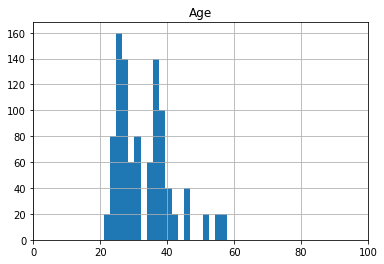

In [115]:
employees_df = pd.read_excel("employees.xlsx")
employees_df.hist(column = "Age", bins = 20) #bins就是要切几段
plt.xlim(0,100)

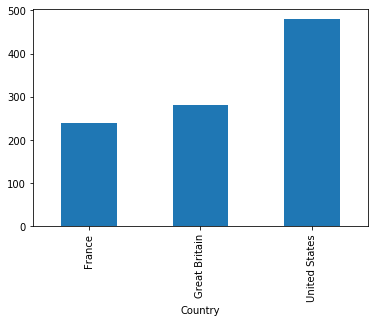

In [10]:
country = employees_df.groupby("Country").count()["Id"]
country.plot.bar()

In [117]:
# most freq name
employees_df = employees_df.drop_duplicates(["Last Name","First Name"])
employees_df["Last Name"].value_counts()

Underdahl     1
Hail          1
Sanor         1
Abbey         1
Karner        1
Benito        1
Abril         1
Perrine       1
Gent          1
Martina       1
Hanner        1
Curren        1
Prothro       1
Magwood       1
Alkire        1
Eudy          1
Bouska        1
Harn          1
Hurn          1
Cail          1
Grindle       1
Lafollette    1
Hashimoto     1
Borger        1
Strawn        1
Vong          1
Partain       1
Cuccia        1
Dalby         1
Brumm         1
Wachtel       1
Claywell      1
Ascencio      1
Pia           1
Pfau          1
Gangi         1
Trumbull      1
Hazelton      1
Becker        1
Unknow        1
Beaudreau     1
Zabriskie     1
Weiland       1
Hacker        1
Danz          1
Mccrystal     1
Melgar        1
Winward       1
Darity        1
Muntz         1
Name: Last Name, dtype: int64

## 4 One Hot Encoding with Pandas

use the function `pandas.get_dummies()` to one-hot-encode our dataset in ¶_NewStudentPerformance.csv_. The documentation is here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html. Create a sub-Dataframe, which holds only numerical values. Compare your result with the result in exercise 4.4. You will probably need to move some columns arround, to match the columns! 
Do I have the same encoding?


In [19]:
stu_performance_df = pd.read_csv("NewStudentPerformance.csv")
stu_performance_onehot_df = pd.get_dummies(stu_performance_df, columns = ["lunch","race/ethnicity","gender","parental level of education","test preparation course"])
stu_performance_onehot_df

,python score,ids,writing score,reading score,math score,lunch_free/reduced,lunch_standard,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,...,gender_female,gender_male,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_completed,test preparation course_none
0,89,'6480',74,72,72,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,70,'7374',88,90,69,0,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
2,78,'1160',93,95,90,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
3,90,'3404',44,57,47,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
4,99,'9819',75,78,76,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,70,'8533',95,99,88,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
996,96,'3840',55,55,62,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
997,70,'1925',65,71,59,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
998,74,'4879',77,78,68,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


## 4.1 Custom Index

Extend our dataset with a custom Index, where the index should be the ID of the students. To make you implemented the Index correctly, try to acces students over their ID.

In [28]:
set_id_df = stu_performance_onehot_df.set_index("ids")
set_id_df.loc["'6480'"]

python score                                      89
writing score                                     74
reading score                                     72
math score                                        72
lunch_free/reduced                                 0
lunch_standard                                     1
race/ethnicity_group A                             0
race/ethnicity_group B                             1
race/ethnicity_group C                             0
race/ethnicity_group D                             0
race/ethnicity_group E                             0
gender_female                                      1
gender_male                                        0
parental level of education_associate's degree     0
parental level of education_bachelor's degree      1
parental level of education_high school            0
parental level of education_master's degree        0
parental level of education_some college           0
parental level of education_some high school  

## 5 Advanced: Crime Analyst

You work for the CIS (or BND, just something kinda cool). Your task is to help to prevent crime using data. Therefore read the file _crime.csv_ (this is a very big file, might take some tim to load. You can also cut it by slicing it...) 

First:
- remove the column "SHOOTING", 
- Clean the data, by droping all rows where the data is not complete

fullfil the following tasks:

- in a bar chart, plot the count for each crime type (use the column OFFENSE_CODE_GROUP)
- whats the most crimeful day of the week? month? year?

In [29]:
crime_pd = pd.read_csv("crime.csv",engine='python')
crime_pd_dropped = crime_pd.drop(columns = ["SHOOTING"])
crime_pd_dropped.shape

(319073, 16)

In [30]:
crime_pd_cleaned = crime_pd_dropped.dropna(how = "any")
crime_pd_cleaned.shape

(296573, 16)

In [31]:
crime_pd_cleaned

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [39]:
crime_pd_cleaned.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'OCCURRED_ON_DATE',
       'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat',
       'Long', 'Location'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014BDE015608>]],
      dtype=object)

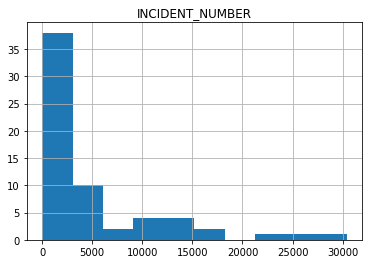

In [33]:
# in a bar chart, plot the count for each crime type (use the column OFFENSE_CODE_GROUP)
count_each_crime_type = crime_pd_cleaned.groupby("OFFENSE_CODE_GROUP").count()
count_each_crime_type.hist(column = "INCIDENT_NUMBER")

In [40]:
# whats the most crimeful day of the week? month? year?
st = crime_pd_cleaned["OCCURRED_ON_DATE"].min()
ed = crime_pd_cleaned["OCCURRED_ON_DATE"].max()
dates = pd.date_range(start=st, end=ed)
daily_event = pd.DataFrame(columns=['Dates', 'Freq'])
#daily_event.loc[0] = [1,2]
#print(daily_event)

#crime_pd_cleaned["OCCURRED_ON_DATE"] < "2017-06-01 00:00:00"

#for i,today in enumerate(dates):
    #nextday = dates[i+1]
    #print(i,today,nextday)
    #freq = today < crime_pd_cleaned["OCCURRED_ON_DATE"] < nextday
    #daily_event.loc[i] = [today,freq]
    
# use the transfer function to get the exact day week month year time!!!!!!

In [59]:
# whats the most crimeful day of the week? month? year?
crime_pd_cleaned.DAY_OF_WEEK.value_counts().idxmax(),crime_pd_cleaned.MONTH.value_counts().idxmax(),crime_pd_cleaned.YEAR.value_counts().idxmax()

('Friday', 8, 2017)

- show the average crimes per hour in a line chart(x-hour, y-avg no. crime)
- for each district, find the street with the most crimes
- For each district, predict the exact location for the next Robbery

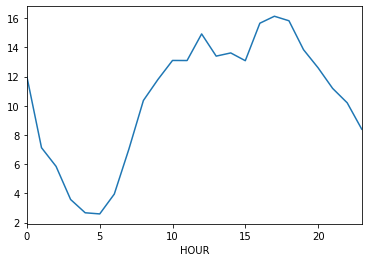

In [76]:
# show the average crimes per hour in a line chart(x-hour, y-avg no. crime)
st = crime_pd_cleaned["OCCURRED_ON_DATE"].min()
ed = crime_pd_cleaned["OCCURRED_ON_DATE"].max()

per_hour = crime_pd_cleaned.groupby("HOUR").count().INCIDENT_NUMBER /  1177
per_hour.plot()
#pd.to_datetime(st) - pd.to_datetime(ed)

In [83]:
# for each district, find the street with the most crimes
crime_pd_cleaned.STREET.value_counts().idxmax()

'WASHINGTON ST'

In [112]:
# For each district, predict the exact location for the next Robbery
robbery_district_df = crime_pd_cleaned.set_index(["OFFENSE_CODE_GROUP"]).loc["Robbery"]
robbery_district_df.groupby("DISTRICT").mean()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
DISTRICT,,,,,,
A1,312.916955,2016.538062,6.806228,10.697232,42.355363,-71.060495
A15,316.180723,2016.698795,6.253012,14.578313,42.377127,-71.061156
A7,312.300448,2016.547085,6.354260,12.560538,42.376805,-71.032605
B2,318.119792,2016.369792,6.895833,14.062500,42.263631,-70.992904
B3,315.888446,2016.358566,7.081673,14.372510,42.286576,-71.086255
C11,315.697900,2016.394184,7.129241,14.536349,42.299111,-71.063906
C6,316.508475,2016.483051,6.728814,12.661017,42.331370,-71.055793
D14,318.222222,2016.259259,7.024691,12.975309,42.351837,-71.139972
D4,315.352294,2016.425688,6.851376,12.893578,42.342590,-71.080167
